# In the name of God

# Investigating customer attraction and customer retention opportunities based on transactional data

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. The dataset is available at <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail+II">UCI datasets</a>.<br/>

### First, the libraries required for this project are inported

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Now the data should be called from the relevant Excel file, and because the data is in two Excel sheets, each sheet is assigned to a data frame

In [2]:
df1=pd.read_excel('C:/Users/Amin Alipour/Desktop/Kaggle/online_retail_II.xlsx',sheet_name='Year 2009-2010')
df2=pd.read_excel('C:/Users/Amin Alipour/Desktop/Kaggle/online_retail_II.xlsx',sheet_name='Year 2010-2011')

### Then we connect the two data frames together to have all the information in one data frame, and because both data frames have the same variables, then it can be done with the following function

In [3]:
online_retail_II=pd.concat([df1,df2])

Because the data frame is obtained from two data frames, we must reset its indexes and delete the previous indexes

In [4]:
online_retail_II=online_retail_II.reset_index(drop=True)

In [5]:
online_retail_II.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Add the revenue column to the table

In [6]:
online_retail_II['Revenue']=online_retail_II['Quantity']*online_retail_II['Price']

The following command gives you a brief overview of the data frame

In [7]:
online_retail_II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
Invoice        1067371 non-null object
StockCode      1067371 non-null object
Description    1062989 non-null object
Quantity       1067371 non-null int64
InvoiceDate    1067371 non-null datetime64[ns]
Price          1067371 non-null float64
Customer ID    824364 non-null float64
Country        1067371 non-null object
Revenue        1067371 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


We find out the number of empty cells in the data frame by the following command

In [8]:
online_retail_II.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
Revenue             0
dtype: int64

We get the dimensions of the data frame

In [9]:
online_retail_II.shape

(1067371, 9)

The following code shows how many percent of transactions are without a customer ID

In [10]:
print("%",100*(online_retail_II['Customer ID'].isna().sum()/online_retail_II.shape[0]))

% 22.766872999172733


### Now we should generate a new data frame which the rows with empty cells are removed

In [11]:
online_retail_II_1=online_retail_II.dropna()

In [12]:
online_retail_II_1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


###  

### Now we want calculate percentage of customers who have purchased only once

In [13]:
online_retail_II_1=online_retail_II_1.reset_index(drop=True)

In the following line, the duplicate invoices are removed in order to obtain a table for extract frequency of purchases

In [14]:
df3=online_retail_II_1.drop_duplicates(subset=['Invoice']).reset_index(drop=True)
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60
2,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,59.50
3,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01 09:08:00,2.10,15362.0,United Kingdom,12.60
4,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.0,United Kingdom,27.44


In [15]:
UC=pd.DataFrame(online_retail_II['Customer ID'].unique()).dropna().count()[0] #UC = Unique Customer ID
print('Total number of customers: ',UC)

Total number of customers:  5942


In [16]:
BUC=df3['Customer ID'].value_counts().reset_index()
NBUC=BUC[BUC['Customer ID']==1].count()[0]
print('Percentage of customers who have purchased only once: ','%',(NBUC/UC)*100)

Percentage of customers who have purchased only once:  % 24.58768091551666


### The percentage of customers who have purchased only once indicates a weakness in customer retention

In [17]:
item=2
while item<BUC['Customer ID'].max():
    NBUC1=BUC[BUC['Customer ID']==item].count()[0]
    if ((NBUC1/UC)*100)>=1:
        print('Percentage of customers who have purchased ',item,' times: ','%',(NBUC1/UC)*100)
    item+=1
print('The remaining percentages are less than 1 percent')
print('The most quantity of purchases = ',BUC['Customer ID'].max())

Percentage of customers who have purchased  2  times:  % 14.725681588690676
Percentage of customers who have purchased  3  times:  % 10.467855940760687
Percentage of customers who have purchased  4  times:  % 8.11174688657018
Percentage of customers who have purchased  5  times:  % 6.563446650959273
Percentage of customers who have purchased  6  times:  % 4.7290474587680915
Percentage of customers who have purchased  7  times:  % 4.274654998317065
Percentage of customers who have purchased  8  times:  % 2.9787950185122853
Percentage of customers who have purchased  9  times:  % 2.6590373611578593
Percentage of customers who have purchased  10  times:  % 2.3224503534163583
Percentage of customers who have purchased  11  times:  % 1.8007404914170313
Percentage of customers who have purchased  12  times:  % 1.733423089868731
Percentage of customers who have purchased  13  times:  % 1.5314708852238303
Percentage of customers who have purchased  14  times:  % 1.5651295859979806
Percentage o

We find out that the difference between the number of customers who purchased only once was much greater than the number of customers who purchased more than once

### The table below shows customers who have purchased only once

In [18]:
BUC.set_axis(['Customer ID','Frequency of Purchases'],inplace=True,axis=1)
C1P = BUC[BUC['Frequency of Purchases']==1].sort_values('Customer ID').reset_index(drop=True)
C1P.head() #C1P: Customers with one purchase

,Customer ID,Frequency of Purchases
0,12350.0,1
1,12351.0,1
2,12354.0,1
3,12366.0,1
4,12367.0,1


### Now we read these customers data from the main data frame

In [19]:
df_C1P = pd.merge(online_retail_II,C1P['Customer ID'],how='inner').sort_values('Customer ID').reset_index(drop=True)
df_C1P.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0
1,543037,21171,BATHROOM METAL SIGN,12,2011-02-02 16:01:00,1.45,12350.0,Norway,17.4
2,543037,22620,4 TRADITIONAL SPINNING TOPS,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0
3,543037,21866,UNION JACK FLAG LUGGAGE TAG,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0
4,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8


### Now, from the data frame obtained above, we get the purchases frequency of each product

In [20]:
df_FS = df_C1P['StockCode'].value_counts().reset_index()
df_FS.set_axis(['StockCode','Frequency'],inplace=True,axis=1)
df_FS.head()

,StockCode,Frequency
0,85123A,152
1,21034,135
2,22138,114
3,22423,95
4,22139,85


### Add a description of each stock code and find out which stock codes are most important to our customers who purchase only once and these stock codes can be used to increase the attraction and loyalty of customers

In [21]:
df_FS = pd.merge(df_FS,df_C1P[['StockCode','Description']],how='left').drop_duplicates(subset=['StockCode']).reset_index(drop=True)
df_FS = df_FS[['StockCode','Description','Frequency']]
df_FS.head()

,StockCode,Description,Frequency
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,152
1,21034,REX CASH+CARRY JUMBO SHOPPER,135
2,22138,BAKING SET 9 PIECE RETROSPOT,114
3,22423,REGENCY CAKESTAND 3 TIER,95
4,22139,RETROSPOT TEA SET CERAMIC 11 PC,85


### In the following, by analyzing Pareto on the frequency of purchase of each stock code, the stock codes that are more important will be  selected

In [22]:
df_ParetoF = df_FS
df_ParetoF['cumpercentage_F'] = df_ParetoF['Frequency'].cumsum()/df_ParetoF['Frequency'].sum()
df_ParetoF = df_ParetoF[df_ParetoF['cumpercentage_F']<=0.70]
df_ParetoF.head()

,StockCode,Description,Frequency,cumpercentage_F
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,152,0.005034
1,21034,REX CASH+CARRY JUMBO SHOPPER,135,0.009505
2,22138,BAKING SET 9 PIECE RETROSPOT,114,0.013280
3,22423,REGENCY CAKESTAND 3 TIER,95,0.016427
4,22139,RETROSPOT TEA SET CERAMIC 11 PC,85,0.019242


### In the following there are similar investigations of the previous 3 tables, but here we investigate the stock codes based on the sales revenue of each type of stock code

In [23]:
df_RS = df_C1P.groupby('StockCode').sum()['Revenue'].sort_values(ascending=False).reset_index()
df_RS.set_axis(['StockCode','Revenue'],inplace=True,axis=1)
df_RS.head()

,StockCode,Revenue
0,22423,7029.30
1,POST,4540.00
2,22413,4067.50
3,85123A,2885.00
4,85099B,2351.97


In [24]:
df_RS = pd.merge(df_RS,df_C1P[['StockCode','Description']],how='right').drop_duplicates(subset=['StockCode']).reset_index(drop=True)
df_RS = df_RS[['StockCode','Description','Revenue']]
df_RS.head()

,StockCode,Description,Revenue
0,22423,REGENCY CAKESTAND 3 TIER,7029.30
1,POST,POSTAGE,4540.00
2,22413,METAL SIGN TAKE IT OR LEAVE IT,4067.50
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2885.00
4,85099B,JUMBO BAG RED RETROSPOT,2351.97


In [25]:
df_ParetoR = df_RS
df_ParetoR['cumpercentage_R'] = df_ParetoR['Revenue'].cumsum()/df_ParetoR['Revenue'].sum()
df_ParetoR = df_ParetoR[df_ParetoR['cumpercentage_R']<=0.70]
df_ParetoR.head()

,StockCode,Description,Revenue,cumpercentage_R
0,22423,REGENCY CAKESTAND 3 TIER,7029.30,0.015709
1,POST,POSTAGE,4540.00,0.025854
2,22413,METAL SIGN TAKE IT OR LEAVE IT,4067.50,0.034944
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2885.00,0.041391
4,85099B,JUMBO BAG RED RETROSPOT,2351.97,0.046648


### Now get an interface between the two data frames related to previous Pareto analyzes

### As a result, the products listed below should be focused on attracting and retaining customers

In [26]:
df_result = pd.merge(df_ParetoF.drop(columns=['cumpercentage_F']),df_ParetoR[['StockCode','Description','Revenue']],how='inner').drop_duplicates(subset=['StockCode']).reset_index(drop=True)
df_result.head()

,StockCode,Description,Frequency,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,152,2885.00
1,21034,REX CASH+CARRY JUMBO SHOPPER,135,213.75
2,22138,BAKING SET 9 PIECE RETROSPOT,114,1903.80
3,22423,REGENCY CAKESTAND 3 TIER,95,7029.30
4,22139,RETROSPOT TEA SET CERAMIC 11 PC,85,1405.80


### Now we add YearMonth column, which is obtained from the date column, in the data frame for customers who have purchased only once

In [27]:
df_C1P['InvoiceYearMonth']=pd.to_datetime(df_C1P['InvoiceDate']).map(lambda date: str((date.year))+'-'+dt.datetime(2000,date.month,29).strftime('%m'))
df_C1P.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceYearMonth
0,543037,21915,RED HARMONICA IN BOX,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0,2011-02
1,543037,21171,BATHROOM METAL SIGN,12,2011-02-02 16:01:00,1.45,12350.0,Norway,17.4,2011-02
2,543037,22620,4 TRADITIONAL SPINNING TOPS,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0,2011-02
3,543037,21866,UNION JACK FLAG LUGGAGE TAG,12,2011-02-02 16:01:00,1.25,12350.0,Norway,15.0,2011-02
4,543037,21832,CHOCOLATE CALCULATOR,12,2011-02-02 16:01:00,1.65,12350.0,Norway,19.8,2011-02


### We categorize the number of customers who have purchased only once, based on the months of each year 

In [28]:
df_MonthlyNewCustomer = df_C1P.groupby('InvoiceYearMonth')['Customer ID'].nunique().reset_index()
df_MonthlyNewCustomer.set_axis(['InvoiceYearMonth','Number of New Customers'],inplace=True,axis=1)
df_MonthlyNewCustomer.head()

,InvoiceYearMonth,Number of New Customers
0,2009-12,87
1,2010-01,52
2,2010-02,53
3,2010-03,76
4,2010-04,64


A diagram is being drawn for the table above

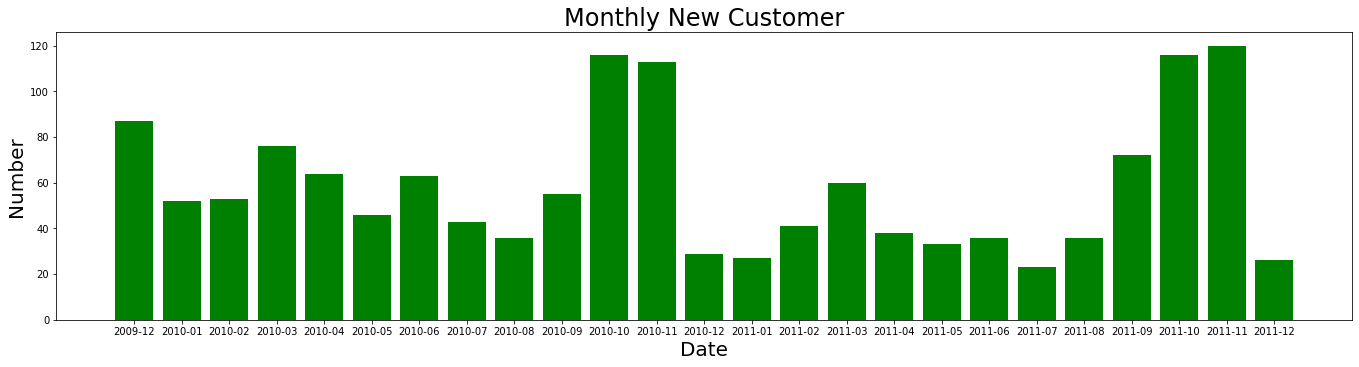

In [29]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 3, 1])
axes.bar(df_MonthlyNewCustomer['InvoiceYearMonth'],height=df_MonthlyNewCustomer['Number of New Customers'],color="Green")
axes.set_xlabel('Date',size=20)
axes.set_ylabel('Number',size=20)
axes.set_title('Monthly New Customer',size=24);
plt.show()

### It is inferred from the chart above that more customers can be attracted later in the year, especially in October and November

### Therefore, in order to attract customers, attention should be paid to these months and to the products that were obtained from the "df_result" data frame

#  

## FINISH